一些简要图表

导入合并后的数据，并按照updatetime排序

In [130]:
import datetime
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import re
import datetime
from pandas import DataFrame, Series
from six import BytesIO
import os 
import pandas as pd 
path="C:/Users/lenovo/Desktop/高频/tick-levelII/"
f=open(path+'data_fu2001.csv','r',encoding='utf-8')
fu=pd.read_csv(f,engine='python').sort_values(by='UpdateTime',ascending=True).reset_index(drop=True)
f=open(path+'data_ag1912.csv','r',encoding='utf-8')
ag=pd.read_csv(f,engine='python').sort_values(by='UpdateTime',ascending=True).reset_index(drop=True)
f=open(path+'data_bu1912.csv','r',encoding='utf-8')
bu=pd.read_csv(f,engine='python').sort_values(by='UpdateTime',ascending=True).reset_index(drop=True)
fu[0:5]

,Unnamed: 0,InstrumentID,TradingDay,nowTime,UpdateTime,LastPrice,Volume,HighestPrice,LowestPrice,OpenPrice,...,BidVolume[2],BidVolume[3],BidVolume[4],UpperLimitPrice,LowerLimitPrice,OpenInterest,Turnover,PreClosePrice,PreOpenInterest,PreSettlementPrice
0,14256,fu2001,20190910,20190910-090000.531,20190910-090000.500,2290,729028,2294,2250,2250,...,50,203,63,2411,2054,747662,16620800000.0,2254,725302,2233
1,14257,fu2001,20190910,20190910-090001.031,20190910-090001.000,2288,729894,2294,2250,2250,...,139,170,312,2411,2054,747498,16640600000.0,2254,725302,2233
2,14258,fu2001,20190910,20190910-090001.531,20190910-090001.500,2286,730708,2294,2250,2250,...,168,235,396,2411,2054,747240,16659200000.0,2254,725302,2233
3,14259,fu2001,20190910,20190910-090002.031,20190910-090002.000,2287,731454,2294,2250,2250,...,176,241,422,2411,2054,746976,16676300000.0,2254,725302,2233
4,14260,fu2001,20190910,20190910-090002.531,20190910-090002.500,2288,732586,2294,2250,2250,...,169,178,249,2411,2054,746910,16702200000.0,2254,725302,2233


tick数据格式说明   

InstrumentID ///合约代码
TradingDay ///交易日
nowTime   ///本地时间
UpdateTime ///行情时间(交易所发出信号的时间) 
LastPrice///最新价（tick最后一笔的成交价）
Volume ///累计成交量
HighestPrice///最高价
LowestPrice///最低价 OpenPrice///今开盘 ClosePrice///今收盘  AskPrice///申卖价一  AskVolume///申卖量一   
BidPrice///申买价一 BidVolume///申买量一 UpperLimitPrice///涨停板价 LowerLimitPrice///跌停板价
OpenInterest///昨持仓量    
Turnover///成交金额
PreClosePrice///昨收盘
PreOpenInterest///昨持仓量
PreSettlementPrice///上次结算价

新添加数据：dvolume单个tick的成交量，cum_Volume n个tick累计成交量

画出FU燃油期货20190910日的价量走势

In [152]:
fu1=fu[fu['TradingDay']=='20190910']
fu1[['Volume','LastPrice']]=fu1[['Volume','LastPrice']].astype('float')

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

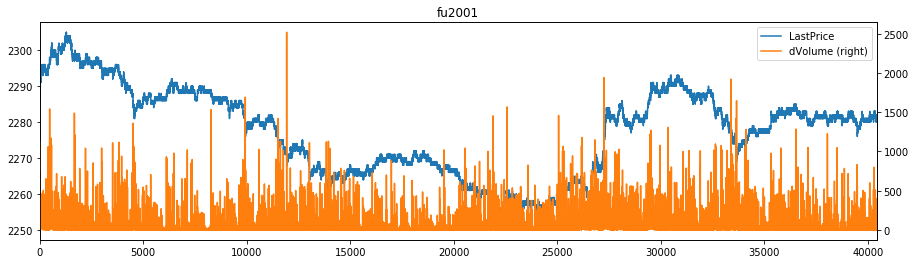

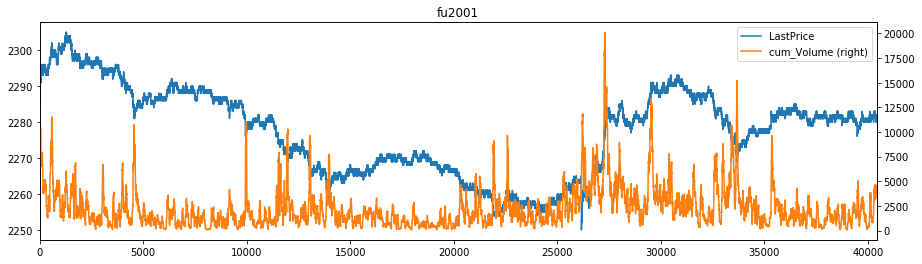

In [154]:
fu1['dVolume']=fu1['Volume'].astype('float').diff()  #单个tick的成交量
fu1['dVolume'][fu1['dVolume']<-200000]=0
fu1['cum_Volume']=fu1['dVolume'].rolling(60).sum()#60tick累计成交量
fu1[['LastPrice','dVolume']].plot(title='fu2001',figsize=(15,4),secondary_y='dVolume')
fu1[['LastPrice','cum_Volume']].plot(title='fu2001',figsize=(15,4),secondary_y='cum_Volume')

白银201910

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

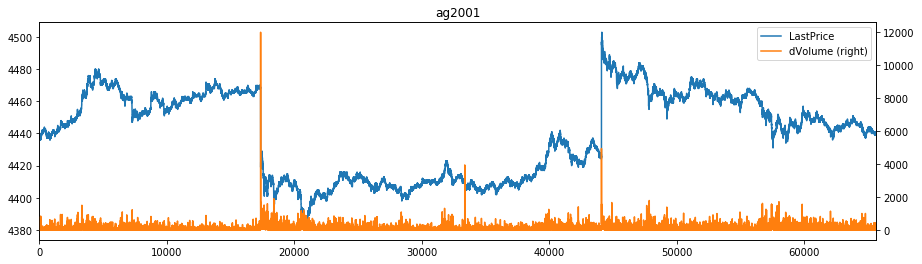

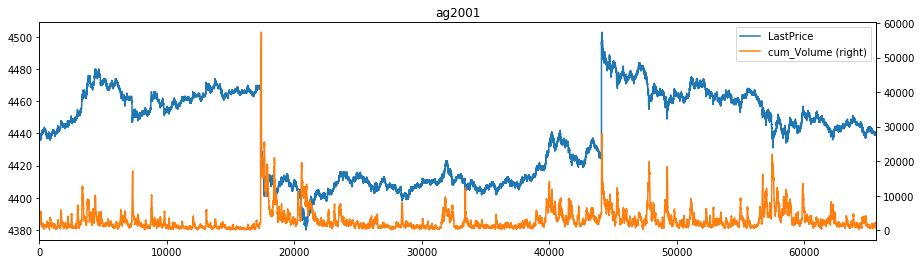

In [156]:
ag1=ag[ag['TradingDay']=='20190910']
ag1[['Volume','LastPrice']]=ag1[['Volume','LastPrice']].astype('float')
ag1['dVolume']=ag1['Volume'].diff()
ag1['dVolume'][ag1['dVolume']<-1000000]=0
ag1['dVolume'][ag1['dVolume']>1000000]=0
ag1['cum_Volume']=ag1['dVolume'].rolling(60).sum()#60tick累计成交量
ag1[['LastPrice','dVolume']].plot(title='ag2001',figsize=(15,4),secondary_y='dVolume')
ag1[['LastPrice','cum_Volume']].plot(title='ag2001',figsize=(15,4),secondary_y='cum_Volume')

沥青20190910

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

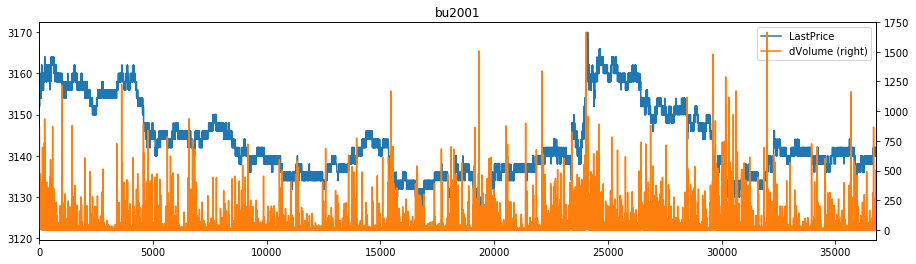

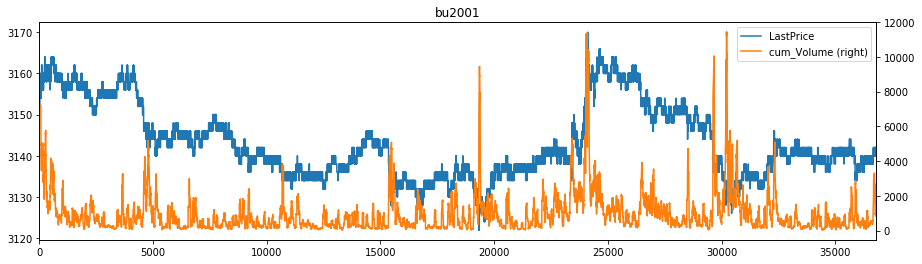

In [164]:
bu1=bu[bu['TradingDay']==20190910]
bu1[['Volume','LastPrice']]=bu1[['Volume','LastPrice']].astype('float')
bu1['dVolume']=bu1['Volume'].diff()
bu1['dVolume'][bu1['dVolume']<-200000]=0
bu1['dVolume'][bu1['dVolume']>200000]=0
bu1['cum_Volume']=bu1['dVolume'].rolling(60).sum()#60tick累计成交量
bu1[['LastPrice','dVolume']].plot(title='bu2001',figsize=(15,4),secondary_y='dVolume')
bu1[['LastPrice','cum_Volume']].plot(title='bu2001',figsize=(15,4),secondary_y='cum_Volume')